In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
df = pd.read_csv('D3.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   region                  5111 non-null   object 
 1   country                 5111 non-null   object 
 2   sex                     5111 non-null   object 
 3   age                     5111 non-null   object 
 4   height                  5111 non-null   float64
 5   weight                  5111 non-null   int64  
 6   blood_type              5111 non-null   object 
 7   insurance               5111 non-null   object 
 8   income                  5111 non-null   object 
 9   race                    5111 non-null   object 
 10  immigrant               5111 non-null   object 
 11  smoking                 5111 non-null   object 
 12  contacts_count          5111 non-null   float64
 13  house_count             5111 non-null   int64  
 14  public_transport_count  5111 non-null   

In [7]:
 df["height"] = df["height"].dropna().astype(int)
 df['insurance']=df['insurance'].astype(bool)
 df["immigrant"]=df["immigrant"].astype(bool)
 df["contacts_count"] = df["contacts_count"].dropna().astype(int)
 df["risk_mortality"] = df["risk_mortality"].dropna().astype(int)
 df["covid19_positive"]=df["covid19_positive"].astype(bool)
 df["covid19_symptoms"]=df["covid19_symptoms"].astype(bool)
 df["covid19_contact"]=df["covid19_contact"].astype(bool)
 df["asthma"]=df["asthma"].astype(bool)
 df["kidney_disease"]=df["kidney_disease"].astype(bool)
 df["liver_disease"]=df["liver_disease"].astype(bool)
 df["compromised_immune"]=df["compromised_immune"].astype(bool)
 df["heart_disease"]=df["heart_disease"].astype(bool)
 df["lung_disease"]=df["lung_disease"].astype(bool)
 df["diabetes"]=df["diabetes"].astype(bool)
 df["hiv_positive"]=df["hiv_positive"].astype(bool)
 df["hypertension"]=df["hypertension"].astype(bool)
 df["other_chronic"]=df["other_chronic"].astype(bool)
 df["nursing_home"]=df["nursing_home"].astype(bool)
 df["health_worker"]=df["health_worker"].astype(bool)

In [9]:
df_categorical= [i for i in df.columns
                       if df[i].dtype.name == 'object']
df_numerical = [i for i in df.columns
                     if df[i].dtype.name != 'object']

['height',
 'weight',
 'insurance',
 'immigrant',
 'contacts_count',
 'house_count',
 'public_transport_count',
 'worried',
 'covid19_positive',
 'covid19_symptoms',
 'covid19_contact',
 'asthma',
 'kidney_disease',
 'liver_disease',
 'compromised_immune',
 'heart_disease',
 'lung_disease',
 'diabetes',
 'hiv_positive',
 'hypertension',
 'other_chronic',
 'nursing_home',
 'health_worker',
 'risk_mortality']

In [10]:
df_categorical

['region',
 'country',
 'sex',
 'age',
 'blood_type',
 'income',
 'race',
 'smoking',
 'working']

In [11]:
df_numerical

['height',
 'weight',
 'insurance',
 'immigrant',
 'contacts_count',
 'house_count',
 'public_transport_count',
 'worried',
 'covid19_positive',
 'covid19_symptoms',
 'covid19_contact',
 'asthma',
 'kidney_disease',
 'liver_disease',
 'compromised_immune',
 'heart_disease',
 'lung_disease',
 'diabetes',
 'hiv_positive',
 'hypertension',
 'other_chronic',
 'nursing_home',
 'health_worker',
 'risk_mortality']

In [12]:
df_tree = pd.concat([df[df_numerical],
                        pd.get_dummies(df[df_categorical])], axis=1)

In [13]:
df_tree.shape

(5111, 167)

In [15]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [16]:
df_x = df_tree.drop(['covid19_positive'], axis=1)
df_y = df_tree['covid19_positive']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(df_x,df_y,test_size=0.3)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

rs = 10
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [20]:
print("Train accuracy:", model.score(X_train, Y_train))

Train accuracy: 1.0


In [21]:
print("Test accuracy:", model.score(X_test, Y_test))

Test accuracy: 0.7698826597131682


In [22]:
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       False       0.81      0.83      0.82       972
        True       0.69      0.66      0.68       562

    accuracy                           0.77      1534
   macro avg       0.75      0.75      0.75      1534
weighted avg       0.77      0.77      0.77      1534



In [24]:
importances = model.feature_importances_
feature_names = df_x.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

covid19_symptoms : 0.19277866095919258
income_med : 0.09599797103623164
weight : 0.08581677002851301
worried : 0.06837923390962179
contacts_count : 0.04463037285922635
house_count : 0.03531074474914023
working_travel critical : 0.03151505640968074
height : 0.02128082676743954
race_white : 0.01803338627448678
risk_mortality : 0.015878619510905672
health_worker : 0.01434357315150639
nursing_home : 0.014184882102187886
public_transport_count : 0.013619162065754543
working_stopped : 0.012436437765730059
compromised_immune : 0.01225937910823499
smoking_never : 0.011753732520481504
blood_type_op : 0.01143047926636301
working_never : 0.01141278657803941
age_30_40 : 0.011366531321465872
age_60_70 : 0.010491474608316708


In [30]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

# visualize
model_small = DecisionTreeClassifier(max_depth=3, random_state=rs)
model_small.fit(X_train, Y_train)

print("Train accuracy:", model_small.score(X_train, Y_train))
print("Test accuracy:", model_small.score(X_test, Y_test))

y_pred = model_small.predict(X_test)
print(classification_report(Y_test, y_pred))

Train accuracy: 0.759575062901873
Test accuracy: 0.772490221642764
              precision    recall  f1-score   support

       False       0.87      0.75      0.81       972
        True       0.65      0.81      0.72       562

    accuracy                           0.77      1534
   macro avg       0.76      0.78      0.76      1534
weighted avg       0.79      0.77      0.78      1534



In [26]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.model_selection import GridSearchCV

In [33]:
params = {'criterion': ['gini'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(X_train, Y_train)

result_set = cv_1.cv_results_
print(result_set)


{'mean_fit_time': array([0.02732251, 0.02316608, 0.02345836, 0.0233556 , 0.02595944,
       0.02573459, 0.02754118, 0.02635796, 0.02883139, 0.02778089,
       0.0278137 , 0.02833908, 0.02988758, 0.03007019, 0.0301609 ,
       0.03057625, 0.03338196, 0.03217216, 0.0318912 , 0.03150239,
       0.03404322, 0.03404748, 0.03342037, 0.03322802, 0.03596859,
       0.03589785, 0.03512642, 0.03498602, 0.03746736, 0.03691719,
       0.03679976, 0.03616853, 0.03884945, 0.03850608, 0.03769882,
       0.03780813, 0.03955483, 0.0393995 , 0.03786941, 0.0370652 ,
       0.04151981, 0.04039993, 0.03849192, 0.04057825, 0.04378648,
       0.04212925, 0.0397002 , 0.03894601, 0.04372983, 0.04303904,
       0.0403492 , 0.0392065 , 0.04617841, 0.04371026, 0.04117875,
       0.03935716, 0.0456332 , 0.04255915, 0.04013948, 0.03924775]), 'std_fit_time': array([0.01051693, 0.00039621, 0.00120768, 0.00049493, 0.00111309,
       0.00039893, 0.00551924, 0.00066778, 0.00167938, 0.00040965,
       0.0005483 , 0.00194

In [34]:
import matplotlib.pyplot as plt

train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

Total number of models:  60


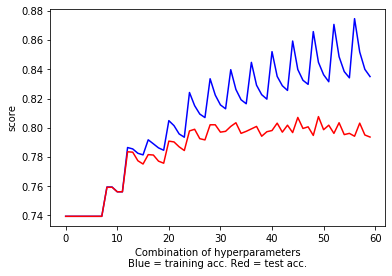

In [38]:
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()

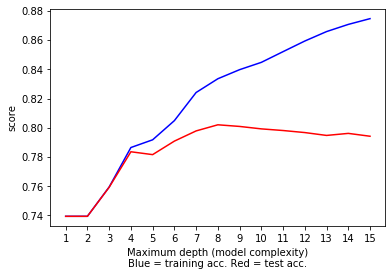

In [45]:
result_set['params']
dd = pd.DataFrame(result_set['params'])

index_ = list(dd.index[(dd['criterion']=='gini') & (dd['min_samples_leaf']==5)])
max_depth_train = []
max_depth_test = []
for i in range(0,len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.show()

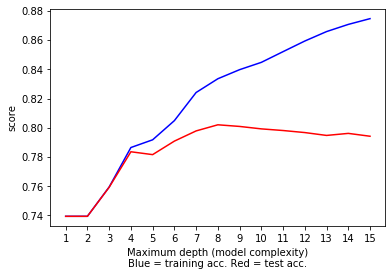

In [46]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']

max_depth_train = []
max_depth_test = []
index_
for i in range(len(index_)):
    max_depth_train.append(train_result[index_[i]])
    max_depth_test.append(test_result[index_[i]])
plt.plot(range(1, len(max_depth_train)+1), max_depth_train, 'b', range(1,len(max_depth_test)+1), max_depth_test, 'r')
plt.xlabel('Maximum depth (model complexity)\nBlue = training acc. Red = test acc.')
plt.xticks(np.arange(1, len(max_depth_train)+1, 1))
plt.ylabel('score')
plt.show()

In [47]:
cv_1.fit(X_train, Y_train)

print("Train accuracy:", cv_1.score(X_train, Y_train))
print("Test accuracy:", cv_1.score(X_test, Y_test))

Train accuracy: 0.8448420464076042
Test accuracy: 0.8096479791395046


In [48]:
dt_cv_best = cv_1.best_estimator_
# probability prediction from decision tree
y_pred_proba_dt = dt_cv_best.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold of 0.5.
(Probs on zero)	(probs on one)	(prediction made)
0.6111111111111112 	 0.3888888888888889 	 False
0.5806451612903226 	 0.41935483870967744 	 True
0.35 	 0.65 	 True
0.7272727272727273 	 0.2727272727272727 	 False
0.9856850715746421 	 0.014314928425357873 	 False
0.0 	 1.0 	 True
0.9430379746835443 	 0.056962025316455694 	 False
0.6923076923076923 	 0.3076923076923077 	 False
0.9523809523809523 	 0.047619047619047616 	 False
0.4 	 0.6 	 True
0.868421052631579 	 0.13157894736842105 	 False
0.0 	 1.0 	 True
0.9856850715746421 	 0.014314928425357873 	 False
0.9856850715746421 	 0.014314928425357873 	 False
0.9856850715746421 	 0.014314928425357873 	 False
0.07692307692307693 	 0.9230769230769231 	 True
0.9430379746835443 	 0.056962025316455694 	 False
0.9856850715746421 	 0.014314928425357873 	 False
0.75 	 0.25 	 True
0.0 	

In [49]:
from sklearn.metrics import roc_auc_score

y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_small = model_small.predict_proba(X_test)
y_pred_proba_dt_cv = dt_cv_best.predict_proba(X_test)

roc_index_dt = roc_auc_score(Y_test, y_pred_proba_dt[:, 1])
roc_index_dt_small = roc_auc_score(Y_test, y_pred_proba_dt_small[:, 1])
roc_index_dt_cv = roc_auc_score(Y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_small:", roc_index_dt_small)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.7474883938901338
ROC index on test for DT_small: 0.8198545025848307
ROC index on test for DT_optimal: 0.8493704509175051
